# Customer Personality Analysis

My first solo project post Codeup! Hoping to polish some techniques that I didn't feel quite as comfortable with the first time around. In this project, I hope to get more comfortable with clustering techniques to provide insight to this dataset.

### Context
**Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### Content
#### Attributes

**People**

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

**Target**

- Need to perform clustering to summarize customer segments.

Acknowledgement
The dataset for this project is provided by Dr. Omar Romero-Hernandez.

In [59]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import datetime
from datetime import date
import matplotlib as plt

## Acquire Data from Kaggle

In [2]:
df = pd.read_csv('marketing_campaign.csv')

In [3]:
df.head()

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...


In [4]:
# Needed to use "sep='\t' to separate the columns by the tab"
df = pd.read_csv('marketing_campaign.csv',sep='\t')

In [5]:
# Checking the head of our data
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
# Shape of our data
df.shape

(2240, 29)

## Time for some cleaning

In [7]:
# Found this nifty line of code to find nulls and unique values
data_info = pd.DataFrame(columns=['Name of Col', 'Num of Null', 'Dtype', 'N_Unique'])

for i in range(0, len(df.columns)):
    data_info.loc[i] = [df.columns[i],
                        df[df.columns[i]].isnull().sum(),
                        df[df.columns[i]].dtypes,
                        df[df.columns[i]].nunique()] 
    
data_info

,Name of Col,Num of Null,Dtype,N_Unique
0,ID,0,int64,2240
1,Year_Birth,0,int64,59
2,Education,0,object,5
3,Marital_Status,0,object,8
4,Income,24,float64,1974
5,Kidhome,0,int64,3
6,Teenhome,0,int64,3
7,Dt_Customer,0,object,663
8,Recency,0,int64,100
9,MntWines,0,int64,776


- Need to drop nulls
- Dt_Customer needs to DateTime
- Encode Education and Marital Status...they're currently objects
- Perhaps even rename columns for my personal readability

In [8]:
df.Z_CostContact.value_counts()

3    2240
Name: Z_CostContact, dtype: int64

In [9]:
df.Z_Revenue.value_counts()

11    2240
Name: Z_Revenue, dtype: int64

#### Going to drop these columns

In [10]:
df.drop(columns = ['Z_CostContact','Z_Revenue'], inplace=True)

In [11]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

#### Dropping nulls

In [12]:
df.isnull().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [13]:
#Checking out the nulls
df[df.Income.isnull()==True]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,0,3,6,0,0,0,0,0,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,0,3,8,0,0,0,0,0,0,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,2,8,9,0,0,0,0,0,0,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,0,2,7,0,0,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,4,8,1,0,0,0,0,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,1,7,6,0,0,0,0,0,0,0


In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(2216, 27)

#### Change Dt_Customer to DateTime

In [16]:
df.Dt_Customer = pd.to_datetime(df['Dt_Customer'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [17]:
df.Dt_Customer.min()

Timestamp('2012-01-08 00:00:00')

In [18]:
df.Dt_Customer.max()

Timestamp('2014-12-06 00:00:00')

#### note to self: Dt_Customer is when the customer joined the company, Year_Birth is when they were born

In [19]:
df.Year_Birth.describe()

count    2216.000000
mean     1968.820397
std        11.985554
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [20]:
df[df.Year_Birth==1893]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,2,4,0,0,0,0,0,0,0


In [21]:
df[df.ID==11004]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,2,4,0,0,0,0,0,0,0


In [22]:
# Dropping this row
df.drop(index=239,inplace=True)

In [23]:
df.Year_Birth.describe()

count    2215.000000
mean     1968.854628
std        11.879423
min      1899.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

Still some weird years...let's see

In [24]:
df['age'] = 2021 - df.Year_Birth

In [25]:
df[df.age >= 90]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,2,5,0,0,0,0,0,1,0,121
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,4,1,0,0,1,0,0,0,0,122


121 and 122 years old...

In [26]:
df.drop(index=[192,339],inplace=True)

In [27]:
df.shape

(2213, 28)

In [28]:
len(df.ID.unique())

2213

#### We don't really need ID

In [29]:
df.drop(columns='ID', inplace=True)

In [30]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,...,4,7,0,0,0,0,0,0,1,64
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,...,2,5,0,0,0,0,0,0,0,67
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,10,4,0,0,0,0,0,0,0,56
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,...,4,6,0,0,0,0,0,0,0,37
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,6,5,0,0,0,0,0,0,0,40


#### We can also drop year_birth, now that we have an age column

In [31]:
df.drop(columns = 'Year_Birth', inplace=True)

### What about education?

In [32]:
df.Education.value_counts()

Graduation    1116
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64

In [33]:
df['Education'].replace({"2n Cycle" : "Post Graduate", 
                           "Master" : "Post Graduate", 
                           "PhD" : "Post Graduate"}, inplace = True)

In [34]:
df.Education.value_counts()

Graduation       1116
Post Graduate    1043
Basic              54
Name: Education, dtype: int64

#### Marital Status

In [35]:
df.Marital_Status.value_counts()

Married     857
Together    572
Single      470
Divorced    231
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [36]:
df[(df.Marital_Status == 'Alone')|(df.Marital_Status == 'Absurd')|(df.Marital_Status == 'YOLO')]

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age
131,Post Graduate,Alone,61331.0,1,1,2013-10-03,42,534,5,47,...,6,8,0,0,0,0,0,0,0,63
138,Post Graduate,Alone,35860.0,1,1,2014-05-19,37,15,0,8,...,2,5,1,0,0,0,0,0,1,48
153,Graduation,Alone,34176.0,1,0,2014-12-05,12,5,7,24,...,4,6,0,0,0,0,0,0,0,33
2093,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,102,125,...,7,1,0,0,1,1,0,0,1,28
2134,Post Graduate,Absurd,65487.0,0,0,2014-10-01,48,240,67,500,...,6,2,0,0,0,0,0,0,0,64
2177,Post Graduate,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,...,6,8,0,0,0,0,0,0,0,48
2202,Post Graduate,YOLO,48432.0,0,1,2012-10-18,3,322,3,50,...,6,8,0,0,0,0,0,0,1,48


In [37]:
df.drop(index = [131,138,153,2093,2134,2177,2202], inplace = True)

In [38]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'age'],
      dtype='object')

#### Making a parent column

In [39]:
df['children'] = df['Kidhome'] + df['Teenhome']

In [40]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,children
0,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,...,7,0,0,0,0,0,0,1,64,0
1,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,...,5,0,0,0,0,0,0,0,67,2
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,...,4,0,0,0,0,0,0,0,56,0
3,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,...,6,0,0,0,0,0,0,0,37,1
4,Post Graduate,Married,58293.0,1,0,2014-01-19,94,173,43,118,...,5,0,0,0,0,0,0,0,40,1


In [43]:
# Categorical column for whether or not they're a parent
df['is_parent'] = np.where(df['children']>0,1,0)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2206 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2206 non-null   object        
 1   Marital_Status       2206 non-null   object        
 2   Income               2206 non-null   float64       
 3   Kidhome              2206 non-null   int64         
 4   Teenhome             2206 non-null   int64         
 5   Dt_Customer          2206 non-null   datetime64[ns]
 6   Recency              2206 non-null   int64         
 7   MntWines             2206 non-null   int64         
 8   MntFruits            2206 non-null   int64         
 9   MntMeatProducts      2206 non-null   int64         
 10  MntFishProducts      2206 non-null   int64         
 11  MntSweetProducts     2206 non-null   int64         
 12  MntGoldProds         2206 non-null   int64         
 13  NumDealsPurchases    2206 non-nul

#### Creating a total_spent column

In [48]:
df['total_spent'] = df['MntWines'] + df['MntFruits'] + df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [49]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,children,is_parent,total_spent
0,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,...,0,0,0,0,0,1,64,0,0,2340
1,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,...,0,0,0,0,0,0,67,2,1,39
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,...,0,0,0,0,0,0,56,0,0,1251
3,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,...,0,0,0,0,0,0,37,1,1,68
4,Post Graduate,Married,58293.0,1,0,2014-01-19,94,173,43,118,...,0,0,0,0,0,0,40,1,1,638


#### Creating a total_purchased column

In [50]:
df['total_purchased'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebVisitsMonth']

In [51]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,children,is_parent,total_spent,total_purchased
0,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,...,0,0,0,0,1,64,0,0,2340,32
1,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,...,0,0,0,0,0,67,2,1,39,11
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,...,0,0,0,0,0,56,0,0,1251,25
3,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,...,0,0,0,0,0,37,1,1,68,14
4,Post Graduate,Married,58293.0,1,0,2014-01-19,94,173,43,118,...,0,0,0,0,0,40,1,1,638,24


#### Creating a total_coupons accepted column

In [52]:
df['total_coupons'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [53]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,children,is_parent,total_spent,total_purchased,total_coupons
0,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,...,0,0,0,1,64,0,0,2340,32,0
1,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,...,0,0,0,0,67,2,1,39,11,0
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,...,0,0,0,0,56,0,0,1251,25,0
3,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,...,0,0,0,0,37,1,1,68,14,0
4,Post Graduate,Married,58293.0,1,0,2014-01-19,94,173,43,118,...,0,0,0,0,40,1,1,638,24,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2206 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2206 non-null   object        
 1   Marital_Status       2206 non-null   object        
 2   Income               2206 non-null   float64       
 3   Kidhome              2206 non-null   int64         
 4   Teenhome             2206 non-null   int64         
 5   Dt_Customer          2206 non-null   datetime64[ns]
 6   Recency              2206 non-null   int64         
 7   MntWines             2206 non-null   int64         
 8   MntFruits            2206 non-null   int64         
 9   MntMeatProducts      2206 non-null   int64         
 10  MntFishProducts      2206 non-null   int64         
 11  MntSweetProducts     2206 non-null   int64         
 12  MntGoldProds         2206 non-null   int64         
 13  NumDealsPurchases    2206 non-nul

array([[<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>,
        <AxesSubplot:title={'center':'Teenhome'}>,
        <AxesSubplot:title={'center':'Dt_Customer'}>,
        <AxesSubplot:title={'center':'Recency'}>],
       [<AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>,
        <AxesSubplot:title={'center':'MntFishProducts'}>,
        <AxesSubplot:title={'center':'MntSweetProducts'}>],
       [<AxesSubplot:title={'center':'MntGoldProds'}>,
        <AxesSubplot:title={'center':'NumDealsPurchases'}>,
        <AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>,
        <AxesSubplot:title={'center':'NumStorePurchases'}>],
       [<AxesSubplot:title={'center':'NumWebVisitsMonth'}>,
        <AxesSubplot:title={'center':'AcceptedCmp3'}>,
        <AxesSubplot:title={'center':'AcceptedCmp4'}>,


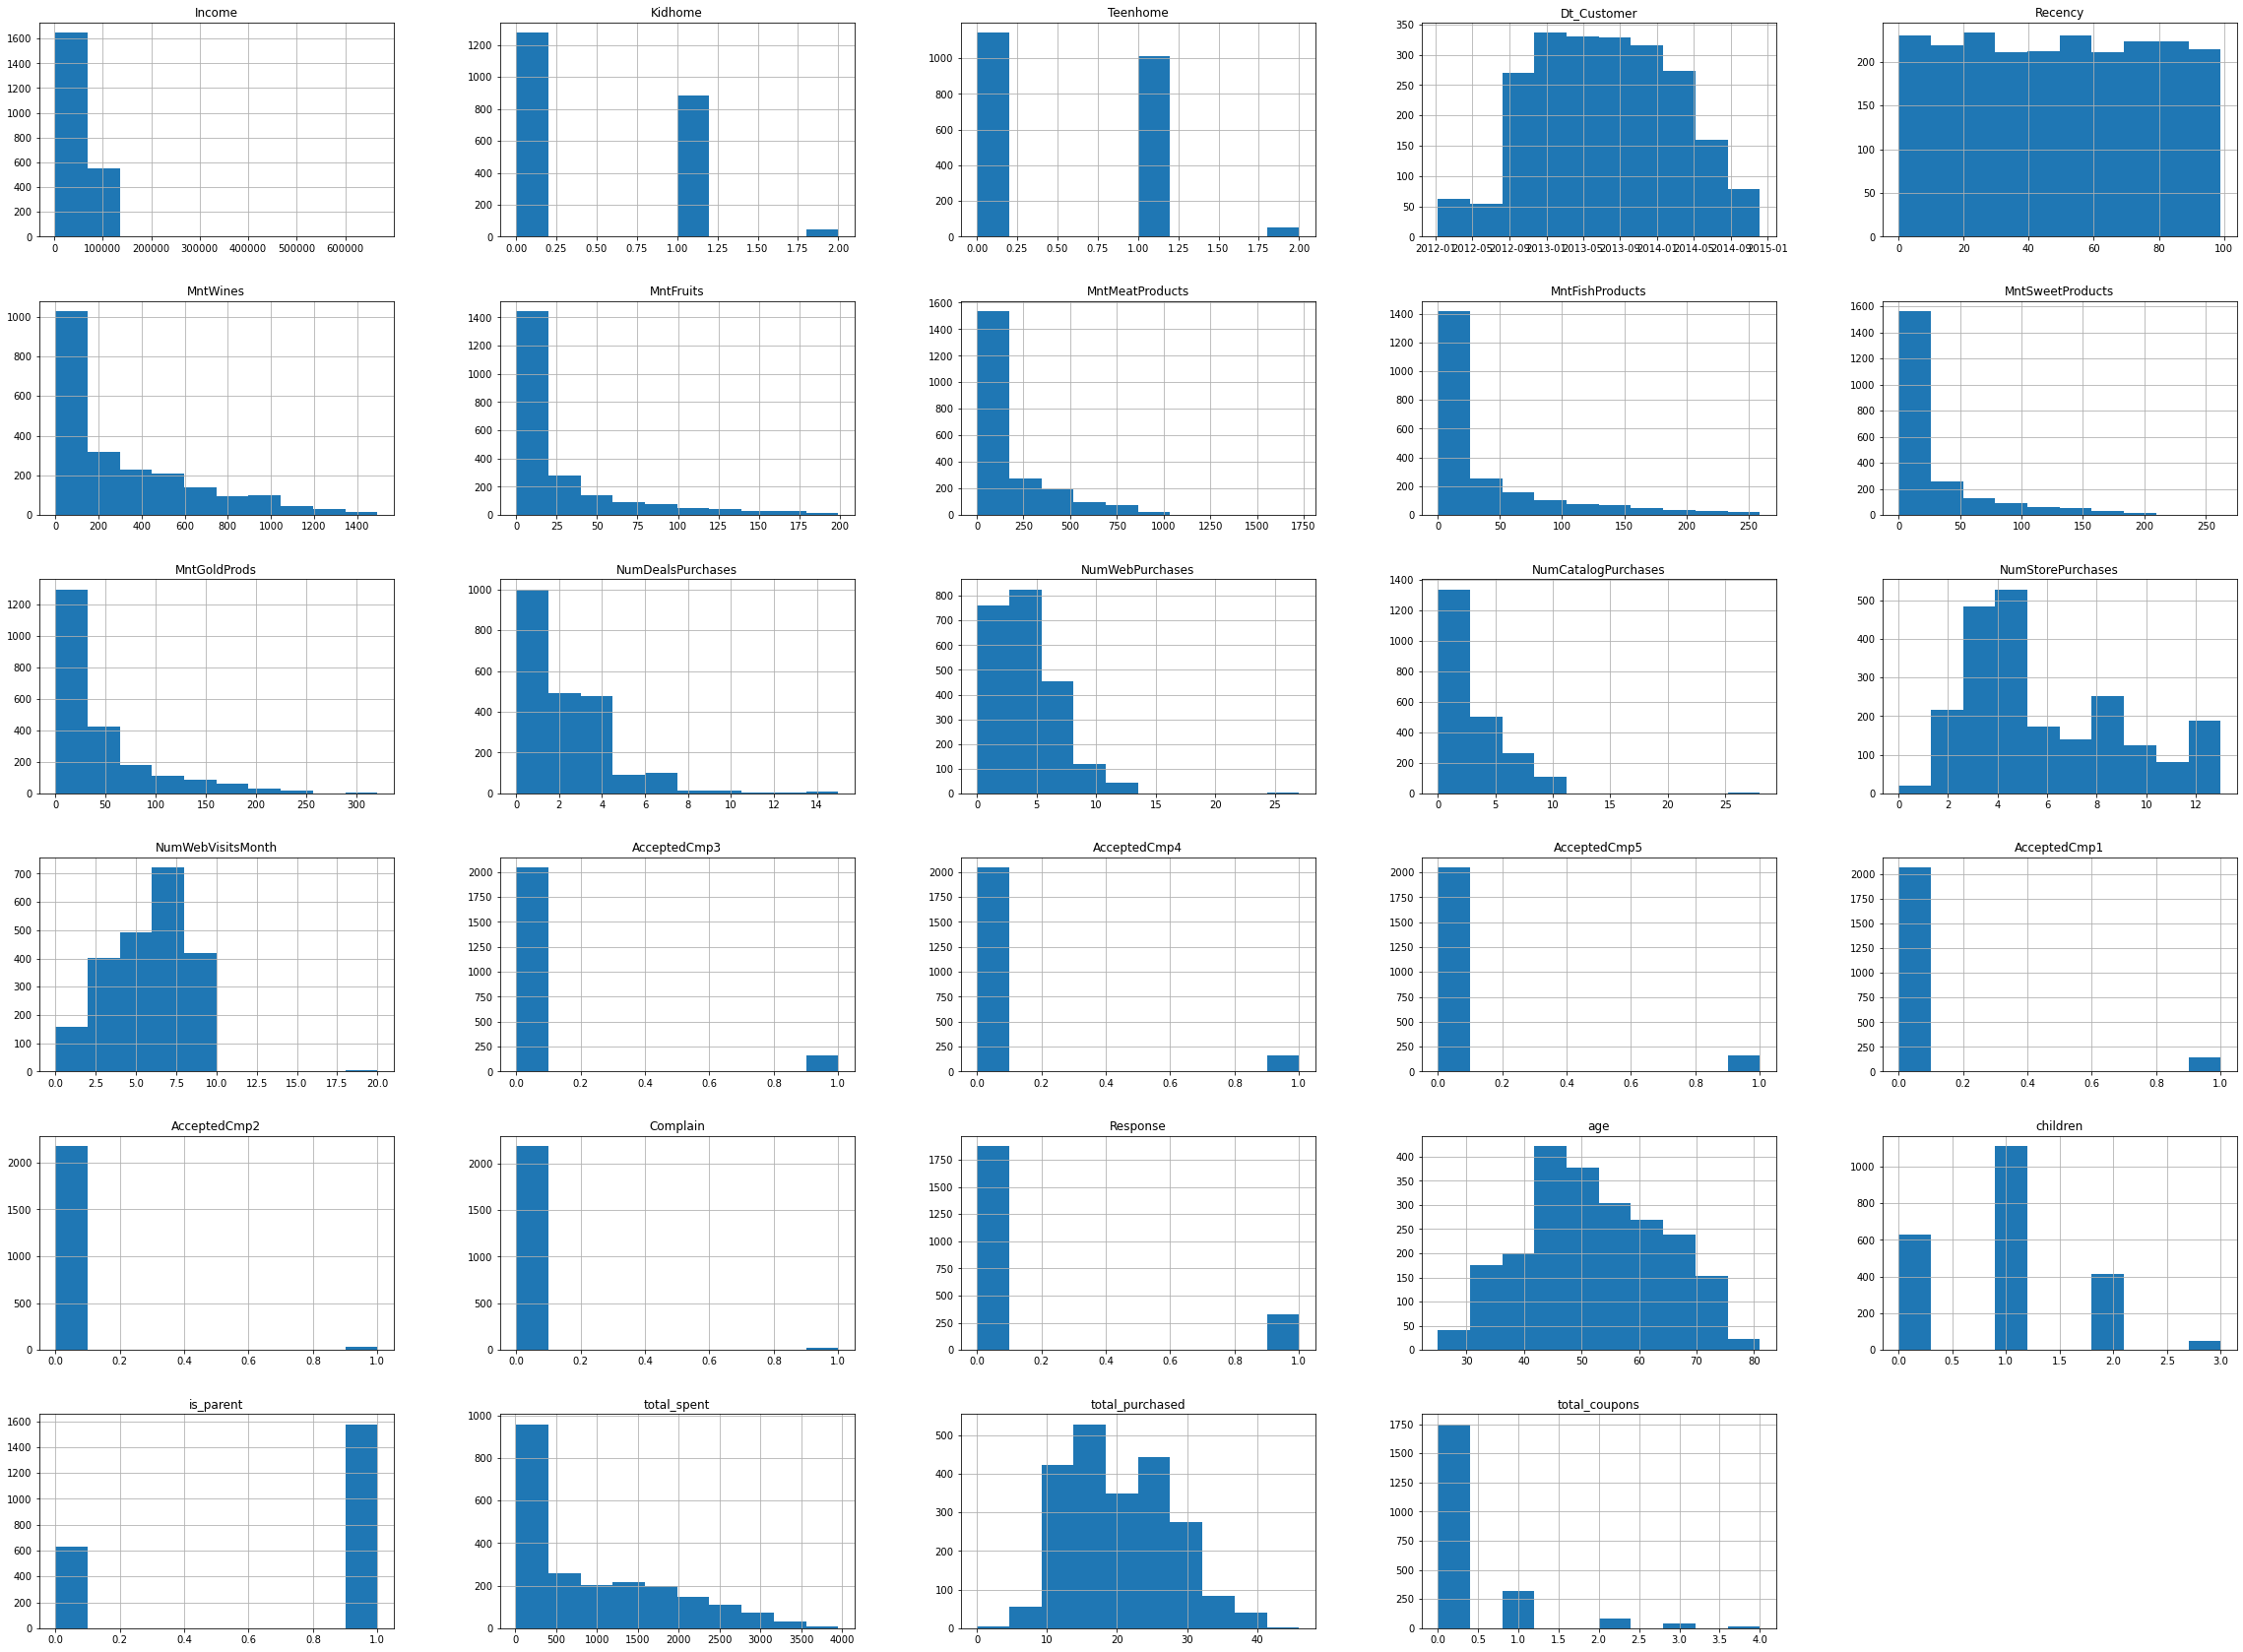

In [99]:
df.hist(figsize=(40,30))